## Import Python Modules and Import Data

First import the preliminary modules that will be used in this project.
Then we import the data and print out the first few lines in the dataframe.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

all_data = pd.read_csv('all_data.csv')
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## First Look

We take a look at the data without much analysis done to it. Using this, 
we can aggragate data later depending on the results.

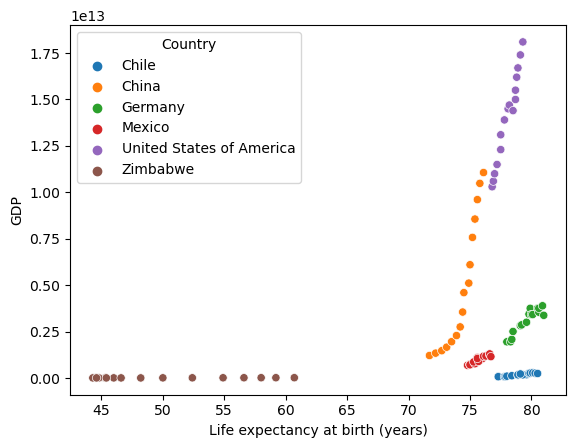

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


<Figure size 640x480 with 0 Axes>

In [4]:
sns.scatterplot(x = all_data['Life expectancy at birth (years)'], y = all_data['GDP'], hue = all_data.Country)
plt.show()
plt.clf()

print(all_data.Country.unique())
print(all_data.Year.unique())

## Life Expectancy vs. GDP

There is a large variance of GDP value between all the coutries. 

We can use a logarithmic scale on the y-axis to remedy this.

We then adjust the x-axis to look more closely at life expectancy of the 5 countries on the right side.

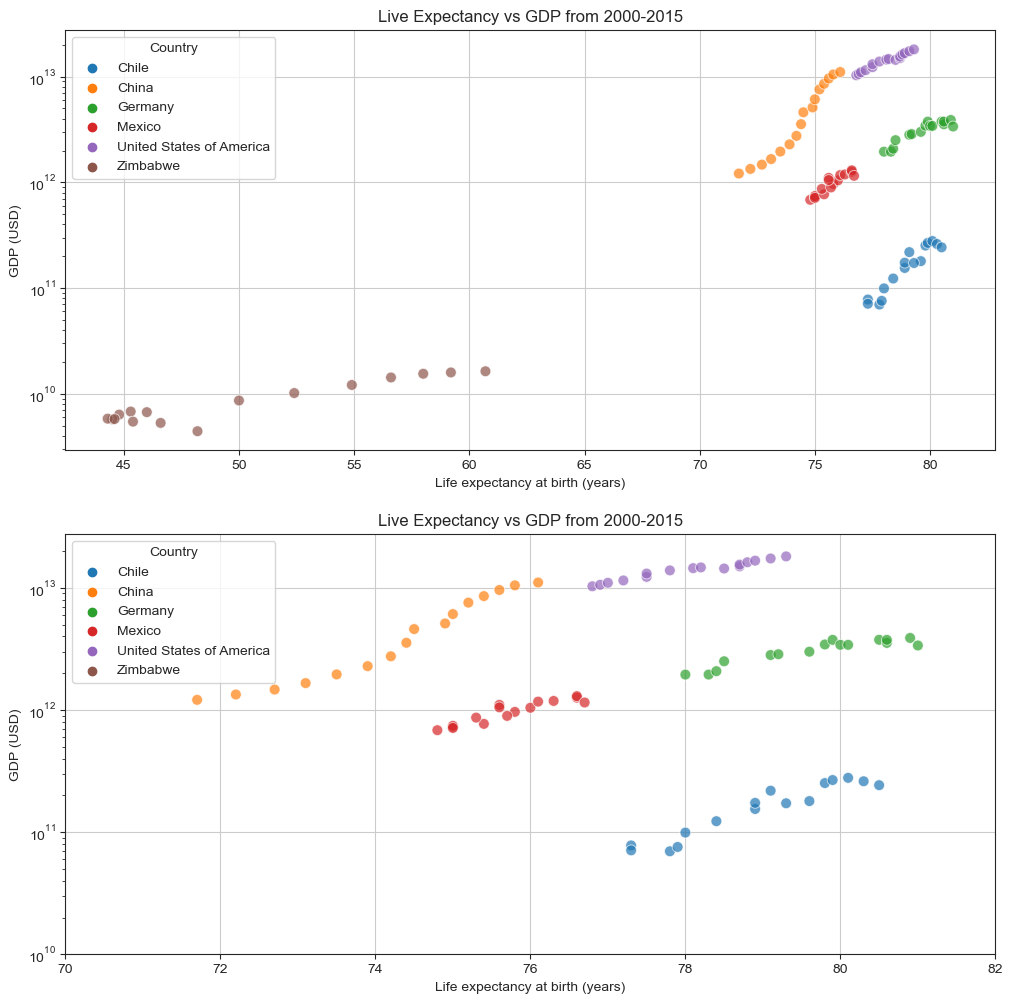

<Figure size 640x480 with 0 Axes>

In [6]:
# Create a figure to try and compare all the countries in one graph.
# The idea is to set the y-axis to a logarithmic scale.
sns.set_style("ticks",{'axes.grid' : True})
f, (ax1, ax2) = plt.subplots(2,1,figsize=(12, 12) )

# Create top plot
ax1 = sns.scatterplot(x = all_data['Life expectancy at birth (years)'], y = all_data['GDP'], hue = all_data.Country, s=60, alpha=0.7, edgecolors="k", ax=ax1)
# Set logarithmic scale on the y variable
ax1.set_yscale("log")
 
# Create bottom plot
ax2 = sns.scatterplot(x = all_data['Life expectancy at birth (years)'], y = all_data['GDP'], hue = all_data.Country, s=60, alpha=0.7, edgecolors="k", ax=ax2)
ax2.set_xlim([70,82])
ax2.set_yscale("log")
ax2.set_ylim(bottom=10E9)

ax1.set_title('Live Expectancy vs GDP from 2000-2015')
ax1.set_ylabel('GDP (USD)')
ax1.set_xlabel('Life expectancy at birth (years)')

ax2.set_title('Live Expectancy vs GDP from 2000-2015')
ax2.set_ylabel('GDP (USD)')
ax2.set_xlabel('Life expectancy at birth (years)')

plt.show()
plt.clf()

## Life Expectancy vs. GDP

We create a FacetGrid to help visualize GDP and life expectancy for each country.

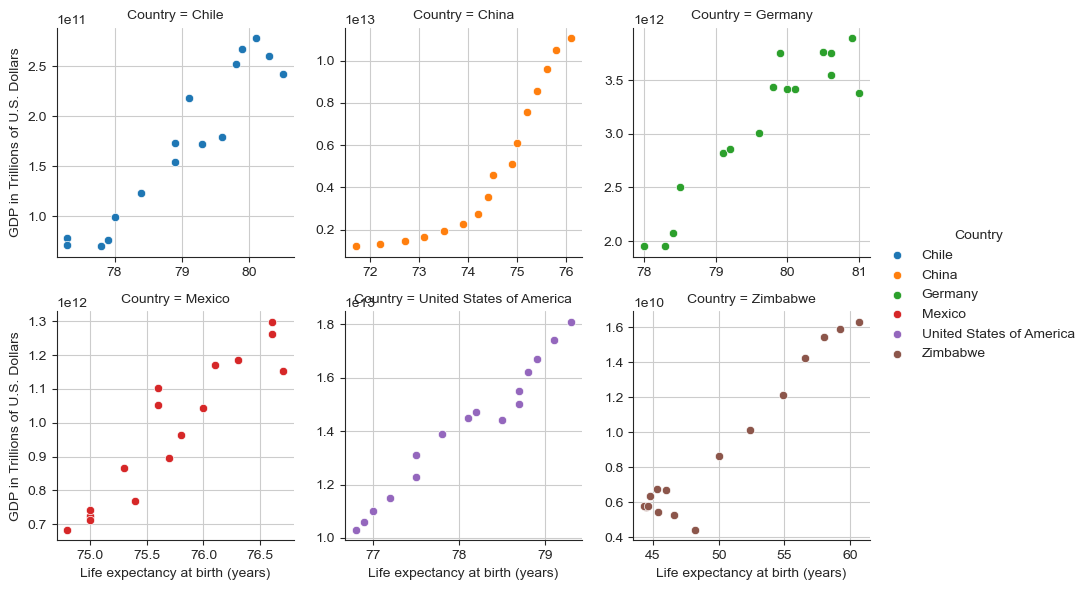

In [9]:
graph = sns.FacetGrid(all_data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life expectancy at birth (years)", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

## Life Expectancy vs. GDP Conclusion

We can see that when GDP rises it seems the life expectancy does as well, but
there are countries with significantly lower GDP (magnitudes lower) compared to other countries but with 
higher life expectancy. 

This would asssume that there is one or more external factors that could affect life expectancy, such as
developement of healthcare systems in these countries as GDP rises.

## Zimbabwe Close-up

In the graph above, we notice the data looks strange for Zimbabwe.

We take a closer look and add 'years' to the data points to better understand what is going on.

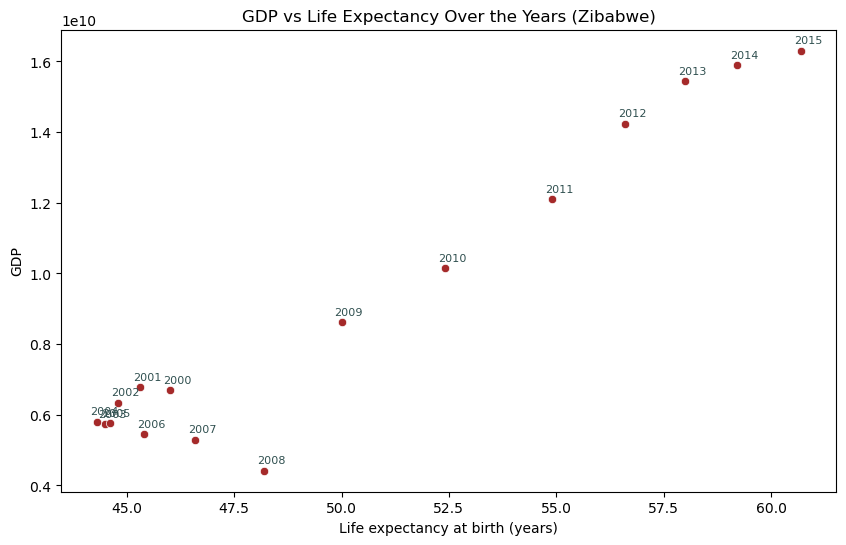

<Figure size 640x480 with 0 Axes>

In [3]:
zimbabwe_data = all_data[all_data.Country == 'Zimbabwe']
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x = zimbabwe_data['Life expectancy at birth (years)'], y = zimbabwe_data['GDP'], color = 'brown')

def annotate_df(row):  
    ax.annotate(row['Year'], (row['Life expectancy at birth (years)'], row['GDP']),
                xytext=(-5,5), 
                textcoords='offset points',
                size=8, 
                color='darkslategrey')

zimbabwe_data.apply(annotate_df,axis=1)
plt.title('GDP vs Life Expectancy Over the Years (Zibabwe)')

plt.show()
plt.clf()

## Zimbabwe Conclusion

Looking at the data points corresponding to years 2000-2008, we see a variance of both GDP and life expectancy.

During this time, Zimbabwe experienced both a political and economic crises, which agrees with what we see in the graph.

This [Wikipedia article](https://en.wikipedia.org/wiki/2000s_in_Zimbabwe) goes through the details more.

## Conclusions

The main question was how does GDP and life expectancy relate to each other in these various countries:
- Are GDP and life expectancy correlated?
    - Yes, they are positively correlated.
- Does GDP cause higher life expectancy?
    - No, or it seems it's unlikely the only factor considering higher life expectancies in lower GDP countries.
- What is the explanation for the scatter plot shape for Zimbabwe?
    - During 2000-2008, Zimbabwe experienced political strife and economic upheaval. 